# 상태 공간 모형(State Space Models)

> **"시계열 생성 구조를 관측식(Observation Equation)과 상태 전이식(State Transition Equation) 두 개의 수식으로 정의하는 시계열 모형"**
> - **관측식(Observation Equation)**  
> : 현재의 상태 $x_t$와 잡음(에러) $\upsilon_t$에 의해 실제로 측정가능한 출력 $y_t$를 생성하는 관계식

\begin{align*}
y_t = f(x_t, \upsilon_t)  
\end{align*}

> - **상태 전이식(State Transition Equation)**  
> : 이전의 상태 $x_{t-1}$와 현재 생성된 잡음(에러) $w_t$에 의해 현재의 상태 $x_t$가 생성되는 관계식

\begin{align*}
x_t = g(x_{t-1}, w_t)  
\end{align*}

> - **동적 시스템(Dynamic System)**  
> : 입력 시계열을 받아 출력 시계열을 내놓는 시스템  
> : (예시) ARMA 모형의 경우 백색잡음 $\epsilon_t$를 입력받아 $y_t$를 출력하는 동적 시스템  

> - **상태 변수(State Variable)**  
> : 동적 시스템의 현재 상태를 정의하는 값의 집합  
> : (예시) AR($p$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$이 상태변수  
> : (예시) ARMA($p,q$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$과 $q$개의 과거 $\epsilon$값 $\{\epsilon_{t-1}, \epsilon_{t-2}, \cdots, \epsilon_{t-q}\}$이 상태변수  

\begin{align*}
\text{Equation of AR}(p) && Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \epsilon_t
\end{align*}

\begin{align*}
\text{Equation of ARMA}(p,q) && Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1}  \cdots  + \theta_q \epsilon_{t-q} + \epsilon_t
\end{align*}

<center><img src='Image/SSM_Example.png' width='500'></center>

## 지수평활법(Simple Exponential Smoothing)

> **"추세나 계절성 패턴이 없는 경우 적합"**  
> **"미래 시계열 데이터는 과거 특정기간 동안의 평균값이며 그 이전의 값들은 미래에 어떠한 정보도 주지 않는다"**  

\begin{align*}
\hat{Y}_{t+1} & = \dfrac{1}{T}\displaystyle \sum_{i=0}^{T} Y_{t-i} \\ & or \\
\hat{Y}_{t+1} & = \dfrac{\alpha}{T}\displaystyle \sum_{i=0}^{T} (1-\alpha)^i Y_{t-i} \\
\end{align*}

C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


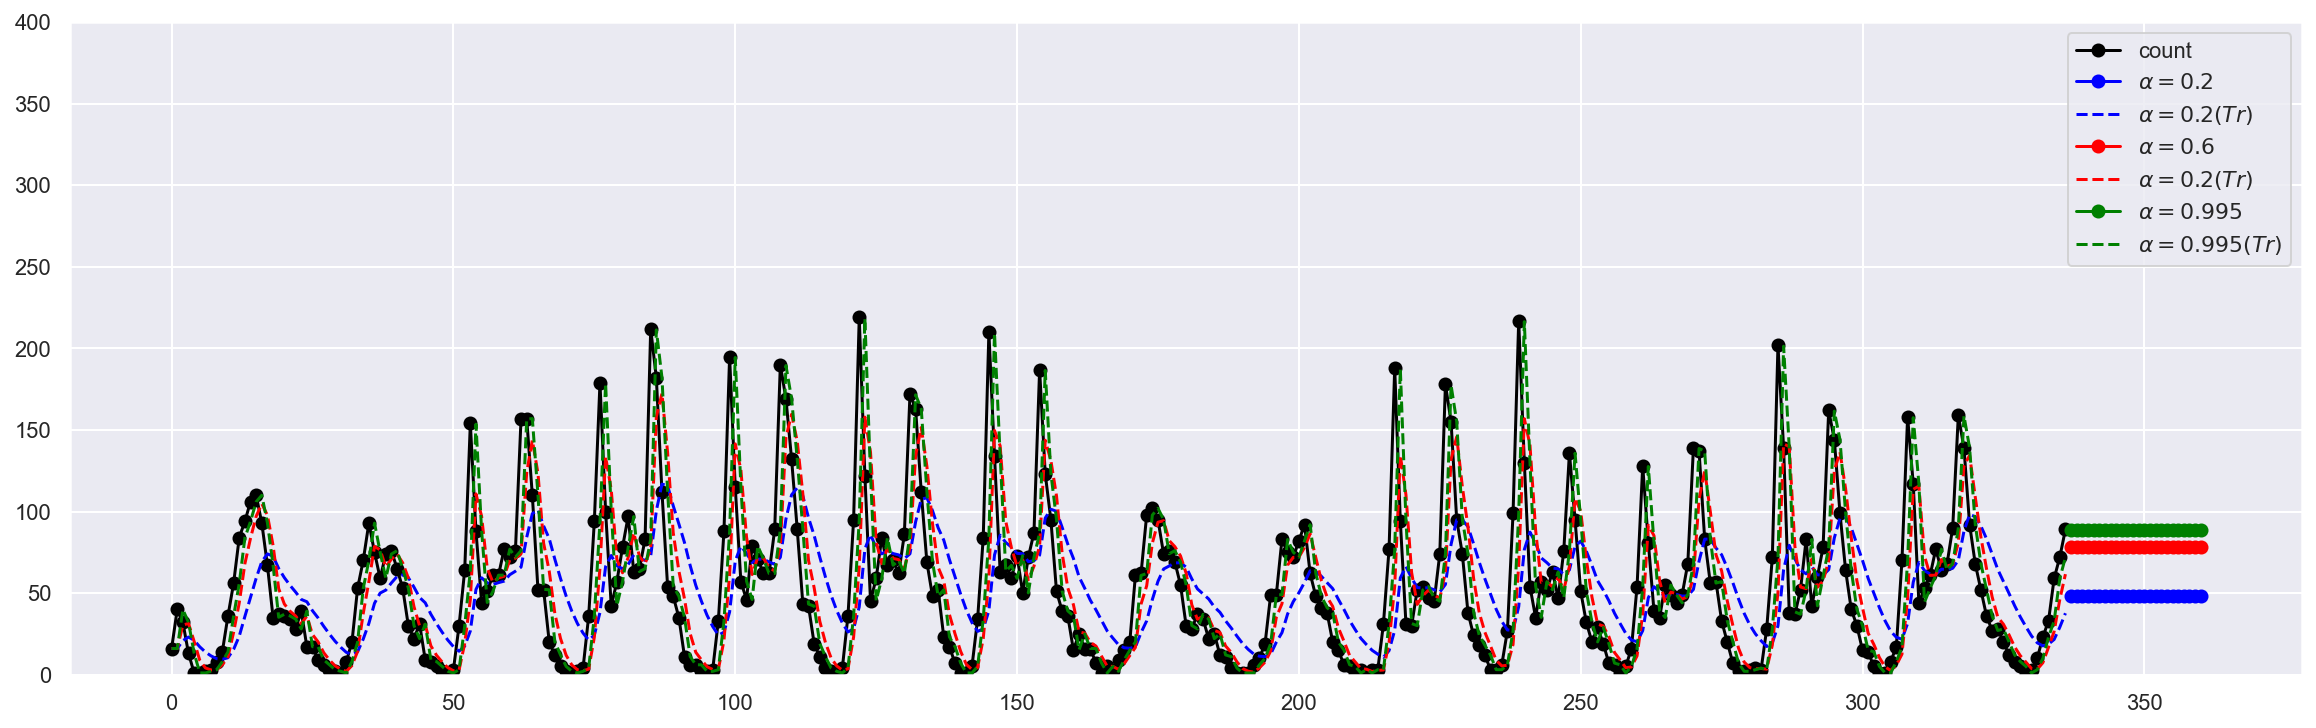

In [22]:
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# 2주치 가져오기
target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

fit1 = sm.tsa.SimpleExpSmoothing(target).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(24).rename(r'$\alpha=0.2$')
fcast1.plot(marker='o', color='blue')
fit1.fittedvalues.plot(style='--', color='blue', label=r'$\alpha=0.2(Tr)$')

fit2 = sm.tsa.SimpleExpSmoothing(target).fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(24).rename(r'$\alpha=0.6$')
fcast2.plot(marker='o', color='red')
fit2.fittedvalues.plot(style='--', color='red', label=r'$\alpha=0.2(Tr)$')

fit3 = sm.tsa.SimpleExpSmoothing(target).fit() # 자동으로 fit
fcast3 = fit3.forecast(24).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fcast3.plot(marker='o', color='green')
fit3.fittedvalues.plot(style='--', color='green', label=r'$\alpha=%s(Tr)$'%fit3.model.params['smoothing_level'])

plt.legend()
plt.show()

## 선형 추세 알고리즘 by Holt

> **"간단 지수평활법에 추세를 반영한 예측 알고리즘"**  

\begin{align*}
\text{Main equation}  && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} \\
\text{Level equation} && \ell_{t} &= \alpha Y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation} && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1}  
\end{align*}

\begin{align*}
where~0 \leq \beta^* \leq 1~is~the~smoothing~parameter~for~the~trend
\end{align*}

| Year | $t$ | $Y_t$ | $ℓ_t$ | $b_t$ | $\hat{Y_t}$ |
|------|---|-------|-------|------|-------|
| 2014 | 0 |  | 17.55 | 4.31 |  |
| 2015 | 1 | 17.55 | 18.41 | 3.62 | 21.86 |
| 2016 | 2 | 21.86 | 21.89 | 3.59 | 22.03 |
| 2017 | 3 | 23.89 | 24.21 | 3.33 | 25.48 |
| 2018 | 4 | 26.93 | 27.05 | 3.24 | 27.54 |

### 선형 추세 알고리즘 by Holt

> **"간단 지수평활법에 추세를 반영한 예측 알고리즘"**  

\begin{align*}
\text{Main equation}  && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} \\
\text{Level equation} && \ell_{t} &= \alpha Y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation} && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1}  
\end{align*}

\begin{align*}
where~0 \leq \beta^* \leq 1~is~the~smoothing~parameter~for~the~trend
\end{align*}

| Year | $t$ | $Y_t$ | $ℓ_t$ | $b_t$ | $\hat{Y_t}$ |
|------|---|-------|-------|------|-------|
| 2014 | 0 |  | 17.55 | 4.31 |  |
| 2015 | 1 | 17.55 | 18.41 | 3.62 | 21.86 |
| 2016 | 2 | 21.86 | 21.89 | 3.59 | 22.03 |
| 2017 | 3 | 23.89 | 24.21 | 3.33 | 25.48 |
| 2018 | 4 | 26.93 | 27.05 | 3.24 | 27.54 |

C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-23-557365b6a5f9>:15: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = sm.tsa.Holt(target, damped=True).fit()
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


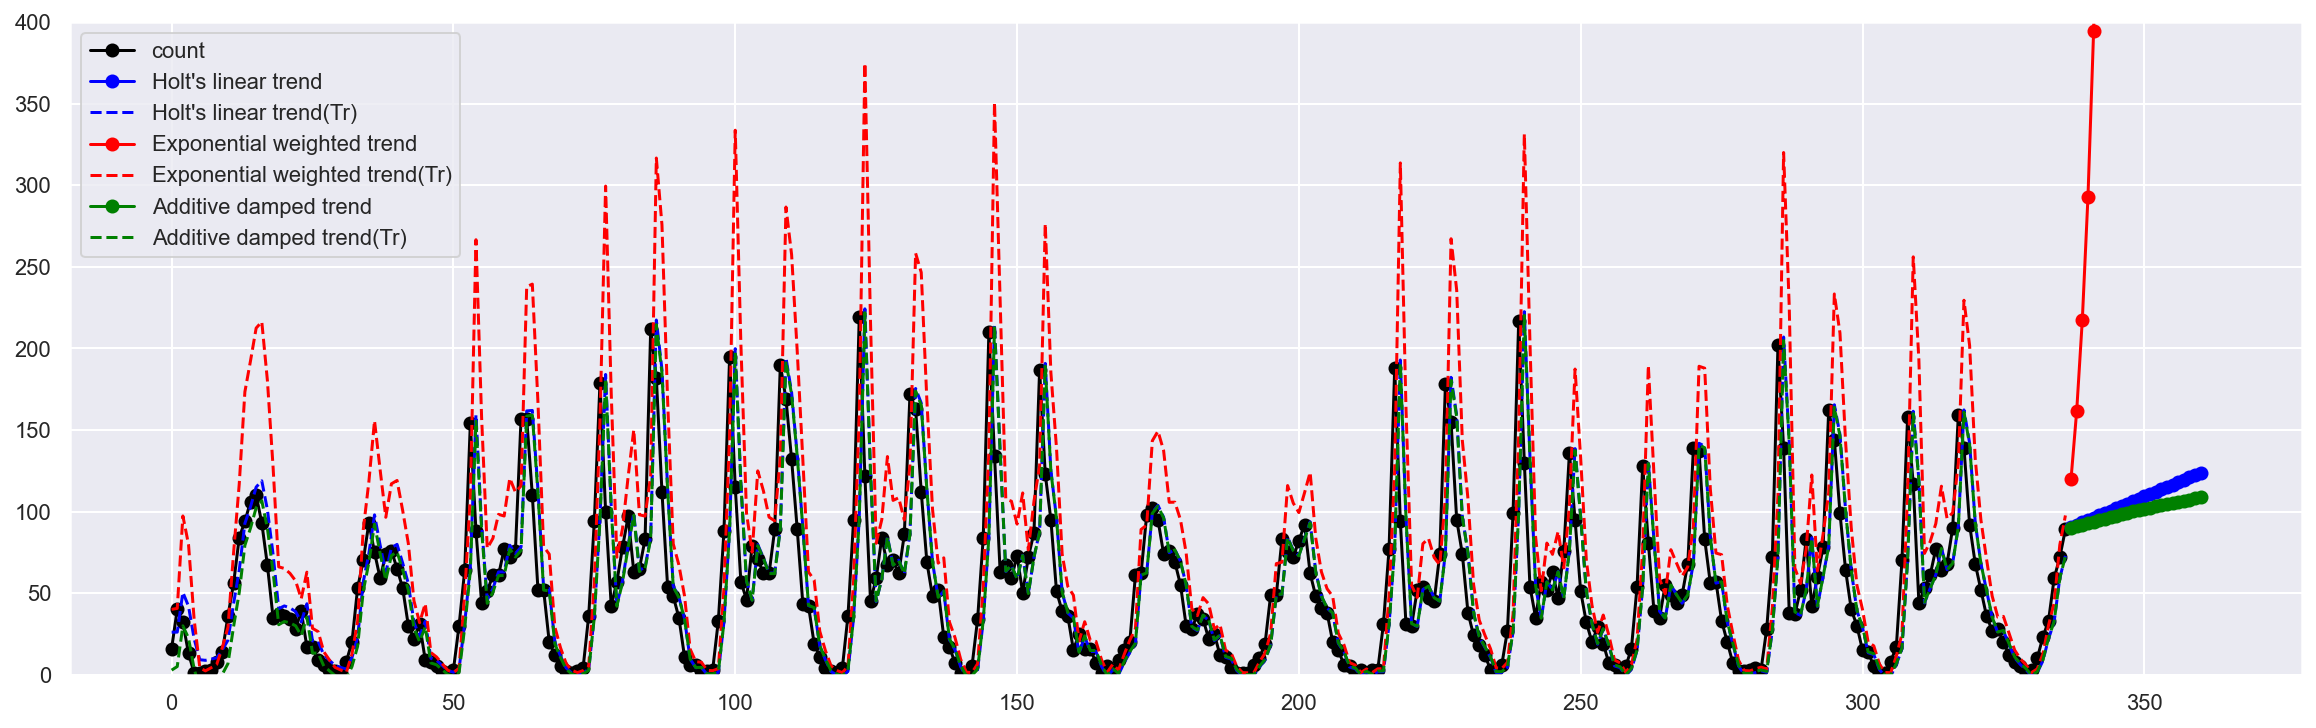

In [23]:
# Holt's Linear Trend
target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

fit1 = sm.tsa.Holt(target).fit()
fcast1 = fit1.forecast(24).rename("Holt's linear trend")
fcast1.plot(marker='o', color='blue')
fit1.fittedvalues.plot(style='--',  color='blue', label="Holt's linear trend(Tr)")

fit2 = sm.tsa.Holt(target, exponential=True).fit()
fcast2 = fit2.forecast(24).rename("Exponential weighted trend")
fcast2.plot(marker='o', color='red')
fit2.fittedvalues.plot(style='--', color='red', label="Exponential weighted trend(Tr)")

fit3 = sm.tsa.Holt(target, damped=True).fit()
fcast3 = fit3.forecast(24).rename("Additive damped trend")
fcast3.plot(marker='o', color='green')
fit3.fittedvalues.plot(style='--', color='green', label="Additive damped trend(Tr)")

plt.legend()
plt.show()

### 계절 알고리즘 by Holt-Winter

> **"선형 추세 알고리즘에 계절성을 반영한 예측 알고리즘"**  

- **Additive Seasonal Method:** $Y_t = T_t + S_t + R_t$, 계절성 변화의 크기가 시간 흐름에 따라 일정한 경우 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} + s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha(Y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m} \\
\end{align*}

\begin{align*}
where~h_{m}^{+} = \lfloor(h-1)/m\rfloor+1~ensures~that~estimates~of~the~sesonal~indices~come~from~the~final~year~of~the~sample \\
\end{align*}

- **Multiplicative Seasonal Method:** $Y_t = T_t \times S_t \times R_t$, 계절성 변화의 크기가 시간 흐름에 비례하여 변경되는 경우 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= (\ell_{t} + hb_{t})s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha \frac{Y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

- **Damped Seasonal Method:** Additive와 Multiplicative 모두 사용되며 장기 예측시 무한정 증가/감소를 방지

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \left[\ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t}\right]s_{t+h-m(k+1)} \\
\text{Level equation}    && \ell_{t} &= \alpha(y_{t} / s_{t-m}) + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)\phi b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + \phi b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

> **Summary of Smoothing Parameters:**

| Level | Trend | Seasonality | Damping |
|----------|---------|-------------|---------|
| $\alpha$ | $\beta$ | $\gamma$ | $\phi$ |

In [43]:
target = raw_all.loc[:24*7*2, 'count']
target

0      16
1      40
2      32
3      13
4       1
       ..
332    23
333    33
334    59
335    72
336    89
Name: count, Length: 337, dtype: int64

In [46]:
raw_all.loc[24*7*2+1:24*7*2+24, 'count']

337    101
338    118
339    129
340    128
341     83
342     84
343     74
344     41
345     57
346     26
347     44
348     39
349     23
350     16
351     15
352      1
353      2
354      1
355      3
356     18
357     32
358     79
359     93
360    104
Name: count, dtype: int64

<ipython-input-48-4a4ae23f2b74>:12: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit2 = sm.tsa.ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add',damped=True).fit(use_boxcox=True)
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


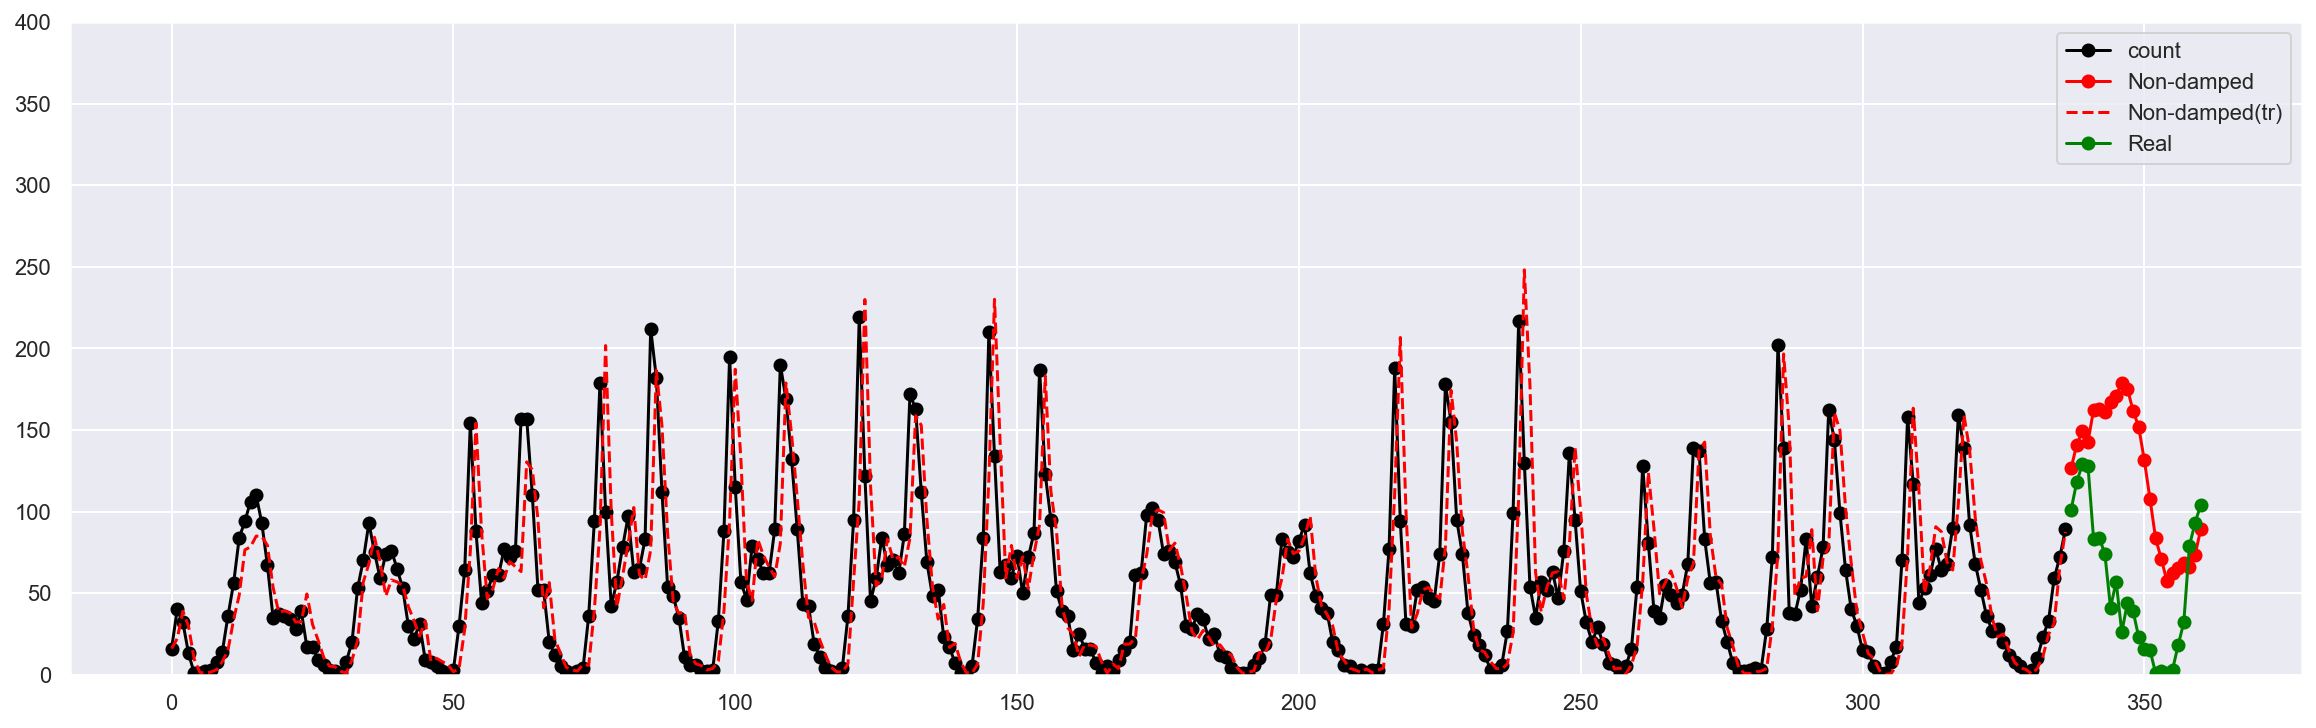

In [48]:
location = './Data/BikeSharingDemand/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

# fit1 = sm.tsa.ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)
# fcast1 = fit1.forecast(24).rename('Non-damped')
# fcast1.plot(marker='o', color='blue')
# fit1.fittedvalues.plot(style='--', color='blue', label='Non-damped(tr)')

fit2 = sm.tsa.ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add',damped=True).fit(use_boxcox=True)
fcast2 = fit2.forecast(24).rename('Non-damped')
fcast2.plot(marker='o', color='red')
fit2.fittedvalues.plot(style='--', color='red', label='Non-damped(tr)')

raw_all.loc[24*7*2+1:24*7*2+24, 'count'].rename('Real').plot(marker='o', color='green')
plt.legend()
plt.show()